<a href="https://colab.research.google.com/github/MinYeongPark/AI_practice/blob/main/3_Selective_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Selective Search를 이용하여 Object Detection을 위한 Region Proposal 영역을 도출

In [ ]:
!pip install selectivesearch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for selectivesearch: filename=selectivesearch-0.4-py3-none-any.whl size=4349 sha256=207e113af01cea769cea1b70b741c3881cc44277385078f75ef8e88399229c36
  Stored in directory: /root/.cache/pip/wheels/83/0e/c9/4713ec9c1692e688f84fd3e80201018a02992949ca63697ba8
Successfully built selectivesearch


In [ ]:
!mkdir /content/data
!wget -O /content/data/audrey01.jpg http://www.futurekorea.co.kr/news/photo/201601/31076_22711_1040.jpg

mkdir: cannot create directory ‘/content/data’: File exists
--2022-10-19 07:24:35--  http://www.futurekorea.co.kr/news/photo/201601/31076_22711_1040.jpg
Resolving www.futurekorea.co.kr (www.futurekorea.co.kr)... 121.125.77.206
Connecting to www.futurekorea.co.kr (www.futurekorea.co.kr)|121.125.77.206|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 110136 (108K) [image/jpeg]
Saving to: ‘/content/data/audrey01.jpg’

/content/data/audre 100%[===================>] 107.55K  85.1KB/s    in 1.3s    

2022-10-19 07:24:39 (85.1 KB/s) - ‘/content/data/audrey01.jpg’ saved [110136/110136]



In [ ]:
import selectivesearch
import cv2
import matplotlib.pyplot as plt
import os

%matplotlib inline

img = cv2.imread('/content/data/audrey01.jpg')

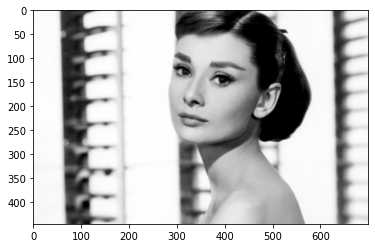

In [ ]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)

In [ ]:
# import selectivesearch
from selectivesearch.selectivesearch import selective_search
_, regions = selective_search(img_rgb, scale=100, min_size = 2000)

In [ ]:
type(regions)

list

In [ ]:
len(regions)

59

In [ ]:
regions # (x, y, width, height)

[{'rect': (0, 0, 59, 348), 'size': 18657, 'labels': [0.0]},
 {'rect': (58, 0, 104, 284), 'size': 16101, 'labels': [1.0]},
 {'rect': (107, 0, 71, 35), 'size': 2302, 'labels': [2.0]},
 {'rect': (71, 0, 127, 446), 'size': 21483, 'labels': [3.0]},
 {'rect': (188, 0, 120, 446), 'size': 47825, 'labels': [4.0]},
 {'rect': (293, 0, 175, 168), 'size': 11755, 'labels': [5.0]},
 {'rect': (299, 0, 161, 63), 'size': 6800, 'labels': [6.0]},
 {'rect': (408, 0, 130, 170), 'size': 5151, 'labels': [7.0]},
 {'rect': (462, 0, 171, 446), 'size': 39930, 'labels': [8.0]},
 {'rect': (630, 0, 20, 446), 'size': 3459, 'labels': [9.0]},
 {'rect': (635, 0, 64, 446), 'size': 8329, 'labels': [10.0]},
 {'rect': (451, 7, 126, 267), 'size': 12093, 'labels': [11.0]},
 {'rect': (438, 14, 73, 149), 'size': 5272, 'labels': [12.0]},
 {'rect': (646, 24, 53, 177), 'size': 5721, 'labels': [13.0]},
 {'rect': (107, 39, 70, 45), 'size': 2658, 'labels': [14.0]},
 {'rect': (0, 57, 64, 389), 'size': 9372, 'labels': [15.0]},
 {'rect'

In [ ]:
# proposal된 bounding box 추리기
cand_rects = [cand['rect'] for cand in regions]
print(cand_rects)

[(0, 0, 59, 348), (58, 0, 104, 284), (107, 0, 71, 35), (71, 0, 127, 446), (188, 0, 120, 446), (293, 0, 175, 168), (299, 0, 161, 63), (408, 0, 130, 170), (462, 0, 171, 446), (630, 0, 20, 446), (635, 0, 64, 446), (451, 7, 126, 267), (438, 14, 73, 149), (646, 24, 53, 177), (107, 39, 70, 45), (0, 57, 64, 389), (110, 91, 67, 43), (285, 103, 74, 157), (305, 105, 162, 161), (303, 109, 105, 94), (304, 119, 213, 159), (650, 137, 49, 142), (109, 142, 67, 43), (117, 191, 61, 40), (306, 213, 169, 233), (653, 258, 46, 188), (336, 262, 230, 184), (422, 264, 102, 86), (65, 268, 105, 178), (308, 322, 62, 124), (69, 336, 77, 110), (650, 137, 49, 309), (65, 268, 105, 178), (285, 103, 123, 157), (646, 24, 53, 422), (285, 103, 182, 163), (306, 213, 169, 233), (438, 7, 139, 267), (285, 103, 232, 175), (58, 0, 112, 446), (336, 262, 230, 184), (285, 0, 232, 278), (71, 0, 127, 446), (71, 0, 127, 446), (71, 0, 127, 446), (71, 0, 127, 446), (408, 0, 169, 274), (285, 0, 281, 446), (299, 0, 278, 274), (635, 0, 64

In [ ]:
green_rgb = (125, 255, 51) # bounding box color
img_rgb_copy = img_rgb.copy()
for rect in cand_rects:
    x1 = rect[0]
    y1 = rect[1]
    x2 = x1 + rect[2]
    y2 = y1 + rect[3]

    img_rgb_copy = cv2.rectangle(img_rgb_copy, (x1, y1), (x2, y2), color = green_rgb, thickness = 1)

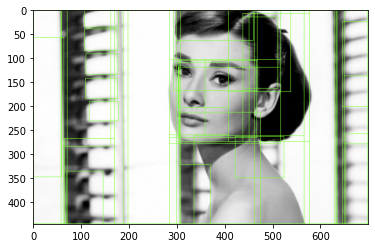

In [ ]:
plt.imshow(img_rgb_copy)

[(0, 0, 59, 348), (58, 0, 104, 284), (65, 0, 133, 446), (188, 0, 120, 446), (293, 0, 175, 203), (299, 0, 161, 63), (408, 0, 169, 274), (462, 0, 171, 446), (630, 0, 69, 446), (438, 14, 73, 149), (646, 24, 53, 177), (0, 57, 64, 389), (285, 103, 232, 175), (305, 105, 162, 161), (306, 213, 260, 233), (285, 103, 232, 175), (630, 0, 69, 446), (285, 0, 232, 278), (408, 0, 169, 274), (285, 0, 281, 446), (299, 0, 278, 274), (0, 0, 162, 446), (0, 0, 162, 446), (285, 0, 292, 446), (285, 0, 348, 446), (188, 0, 445, 446)]


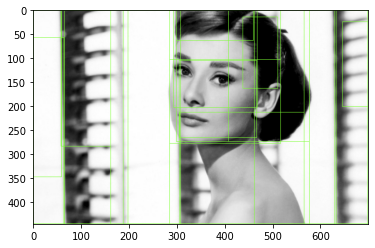

In [ ]:
from selectivesearch.selectivesearch import selective_search
_, regions = selective_search(img_rgb, scale=100, min_size = 5000) # 사이즈 5000이상인 박스만 추려짐.

# proposal된 bounding box 추리기
cand_rects = [cand['rect'] for cand in regions]
print(cand_rects)

green_rgb = (125, 255, 51) # bounding box color
img_rgb_copy = img_rgb.copy()
for rect in cand_rects:
    x1 = rect[0]
    y1 = rect[1]
    x2 = x1 + rect[2]
    y2 = y1 + rect[3]

    img_rgb_copy = cv2.rectangle(img_rgb_copy, (x1, y1), (x2, y2), color = green_rgb, thickness = 1)

plt.imshow(img_rgb_copy)